# 메뉴얼

**코드설명**

(1) 주어진 섹터별로 종목의 주식 데이터를 불러와서 S&P500(시장)과 Bond ETF(채권)의 수익률 비교 코드

(2) 기간은 코드 실행 날짜를 기준으로 하여 한달 전까지의 데이터를 가지고 실행되게 하였음

(3) 미국과 한국의 시차를 고려할 것(주식시장이 종료된 후에 데이터를 불러와야 함)
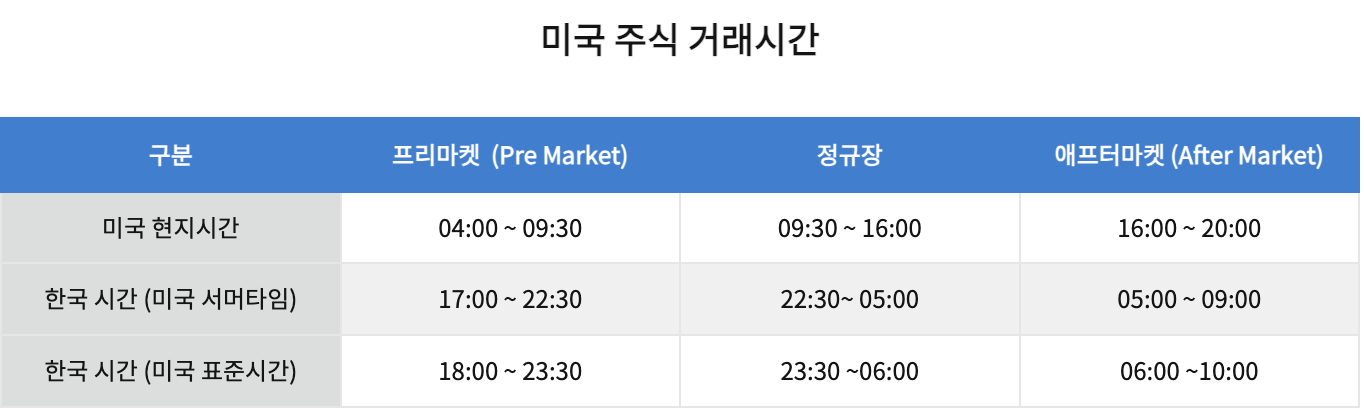

## 1. Sector별 종목 불러오기
- 참고자료: https://docs.google.com/spreadsheets/d/1XH9aMvcCAEkK5p1S3OVn8QE7iAkcp69ffAS0DxWUf8A/edit#gid=0

In [1]:
%%time
import yfinance as yf
import pandas as pd
import datetime as dt

# 시작 날짜와 종료 날짜 설정
start_date = dt.datetime.now() - dt.timedelta(days=30)
end_date = dt.datetime.now()

# # S&P 500 지수 가져오기
# sp500_data = yf.download(tickers='^GSPC', start=start_date, end=end_date)['Adj Close']
# sp500_data = sp500_data.pct_change().add(1).cumprod()

# # 미국 채권 수익률 데이터 가져오기
# bond_yield_data = yf.download(tickers='BND', start=start_date, end=end_date)['Adj Close']
# bond_yield_data = bond_yield_data.pct_change().add(1).cumprod()

# 각 섹터별(총 10개) 해당하는 기업의 티커 리스트
non_memory_semicon_ai_ticks = ['005930.KS', '042700.KS', '000990.KS', '058470.KQ', '039030.KQ', '036830.KQ', 'AMD', 'QCOM', 'NVDA', 'INTC', 'AVGO', 'ASML', 'TSMC34.SA', 'AMAT']
renew_energy_hydrogen_ticks = ['120110.KS', '271940.KS', '336260.KS', '018880.KS', '009830.KS', '100090.KS', '112610.KS', 'PLUG', 'NKLA', 'AIL.SG', 'BE', 'SHEL', 'LIN', '5020.T']
blockchain_coin_ticks = ['COIN', 'RIOT', 'MSTR', '9449.T', 'CME', 'GLXY.TO', 'MARA', 'CAN', '112040.KQ', '027830.KQ', 'HUT', '8473.T', 'CLSK', 'OSTK', 'ACN']
small_reactor_ticks = ['SMR', 'BWXT', 'CCJ', '100840.KS', '034020.KS', 'NXE', 'UEC', '000720.KS', 'DNN', 'YCA.L', 'UUUU', 'NDTAF', 'APLD', '011700.KS', '046120.KQ']
bio_healthcare_ticks = ['068270.KS', '207940.KS', '091990.KQ', '326030.KS', '028300.KQ', '071200.KQ', '302440.KS', 'UNH', 'LLY', 'JNJ', 'ABBV', 'MRK', 'PFE', 'AZN', 'NVO']
memory_semicon_foundry_ticks = ['005930.KS', '000660.KS', '042700.KS', '000990.KS', '005290.KQ', '036930.KQ', '086390.KQ', 'UMC', 'QCOM', 'MU', 'AVGO', 'AMD', 'TXN', '2454.TW', 'TSMC34.SA', 'GFS']
battery_elec_vehicle_ticks = ['006400.KS', '247540.KQ', '003670.KS', '373220.KS', '066970.KQ', '300750.SZ', 'BYD', 'TSLA', 'RIVN', 'LI', 'SEDG', 'BHP', 'LCID', 'ALB', 'SQM']
nano_mat_chemical_oil_ticks = ['027580.KQ', '079980.KS', '077360.KQ', '012610.KS', '121600.KQ', 'DD', 'CBT', 'ARWR', 'KLAC', 'VECO', 'ONTO', '051910.KS', '011780.KS']
space_satellite_defense_ticks = ['BA', 'LMT', 'GD', 'NOC', 'RTX', 'LHX', 'AXON', 'HWM', '012450.KS', '272210.KS', '047810.KS', '064350.KS', '189300.KQ', '099320.KQ', '211270.KQ']
cyber_security_ticks = ['PANW', 'CRWD', 'AKAM', 'FTNT', 'ZS', 'CYBR', 'PLTR', 'IONQ', '053800.KQ', '258790.KQ', '053350.KQ', '203650.KQ', '136540.KQ', '356680.KQ', '056360.KQ']

# 위에서 정의한 기업 티커 리스트를 기반으로 데이터 가져오기

# 각 섹터별 기업 리스트를 이중 리스트로 정의
sector_ticks = [non_memory_semicon_ai_ticks, renew_energy_hydrogen_ticks, blockchain_coin_ticks, small_reactor_ticks, bio_healthcare_ticks,
               memory_semicon_foundry_ticks, battery_elec_vehicle_ticks, nano_mat_chemical_oil_ticks, space_satellite_defense_ticks, cyber_security_ticks]

# 데이터 프레임을 담을 빈 리스트 생성
sector_dataframes = []

# 각 섹터별로 데이터를 가져와서 데이터 프레임으로 변환 후 리스트에 추가
for tick_list in sector_ticks:
    sector_data = yf.download(tickers=tick_list, start=start_date, end=end_date)['Adj Close'].ffill() # 수정종가를 price로 사용 & na값 ffill로 채우기
#    sector_dataframes.append(sector_data.pct_change().add(1).cumprod()) # 누적수익률 계산

# 섹터명을 기반으로 데이터 프레임을 딕셔너리에 저장
sector_names = ['비메모리/AI', '신재생애너지/수소', 'Blockchain&Coin', 'SMR', '바이오/헬스케어', '메모리/파운드리', '배터리/전기차', '나노소재/화학/정유', '우주위성/국방', '사이버보안']


# 데이터프레임을 저장할 딕셔너리 초기화
sector_performance = {}

# 각 섹터별로 데이터를 가져와서 계산 수행
for sector_name, tick_list in zip(sector_names, sector_ticks):
    data = yf.download(tickers=tick_list, start=start_date, end=end_date)[['Open', 'Close']] # 결측치를 채웁니다.
    # 누적 수익률 계산
    sector_performance[sector_name] = (data['Close'] / data['Open'] - 1) * 100  # 수익률 계산식


# # 각 섹터별로 데이터를 가져와서 계산 수행
# for sector_name, tick_list in zip(sector_names, sector_ticks):
#     # 'Open'과 'Close' 가격을 가져옵니다.
#     data = yf.download(tickers=tick_list, start=start_date, end=end_date)[['Open', 'Close']]
    
#     # 결측치를 채우고 계산을 수행합니다.
#     daily_change = (data['Close'].ffill() / data['Open'].ffill() - 1) * 100
    
#     # 결과를 저장합니다.
#     sector_performance[sector_name] = daily_change

[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  15 of 15 completed


1 Failed download:
['OSTK']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


1 Failed download:
['091990.KQ']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  13 of 13 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  14 of 14 completed
[*********************100%%**********************]  15 of 15 completed


1 Failed download:
['OSTK']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


1 Failed download:
['091990.KQ']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  13 of 13 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
CPU times: user 8.68 s, sys: 1.03 s, total: 9.71 s
Wall time: 16.3 s


In [2]:
yield_df = sector_performance.copy()

# 시장, 채권, 섹터 수익률 합치기
yield_df = pd.DataFrame()
yield_df[sector_names[0]] = sector_performance[sector_names[0]].mean(axis=1)
yield_df[sector_names[1]] = sector_performance[sector_names[1]].mean(axis=1)
yield_df[sector_names[2]] = sector_performance[sector_names[2]].mean(axis=1)
yield_df[sector_names[3]] = sector_performance[sector_names[3]].mean(axis=1)
yield_df[sector_names[4]] = sector_performance[sector_names[4]].mean(axis=1)
yield_df[sector_names[5]] = sector_performance[sector_names[5]].mean(axis=1)
yield_df[sector_names[6]] = sector_performance[sector_names[6]].mean(axis=1)
yield_df[sector_names[7]] = sector_performance[sector_names[7]].mean(axis=1)
yield_df[sector_names[8]] = sector_performance[sector_names[8]].mean(axis=1)
yield_df[sector_names[9]] = sector_performance[sector_names[9]].mean(axis=1)
#yield_df['s&p500'] = sp500_data
#yield_df['bond'] = bond_yield_data
yield_df.dropna(axis=0, how='all', inplace=True) # 모든 행이 NaN이면 그 행 삭제(해당 데이터에 있는 모든 주식시장의 영업일이 아님을 의미)
yield_df = yield_df[-20:]

print(yield_df.shape)
print(f"주식 데이터 시작 날짜: {yield_df.index[0]}")
print(f"주식 데이터 종료 날짜: {yield_df.index[-1]}")
yield_df.tail()

(20, 10)
주식 데이터 시작 날짜: 2024-02-07 00:00:00
주식 데이터 종료 날짜: 2024-03-05 00:00:00


,비메모리/AI,신재생애너지/수소,Blockchain&Coin,SMR,바이오/헬스케어,메모리/파운드리,배터리/전기차,나노소재/화학/정유,우주위성/국방,사이버보안
Date,,,,,,,,,,
2024-02-28,1.541005,0.740683,-3.522362,-0.031028,-0.057020,1.947712,0.083767,1.123365,1.494401,0.533556
2024-02-29,0.834319,-1.829761,-4.727554,-1.130522,-0.345148,0.412124,1.013068,0.107631,-1.380558,-1.219509
2024-03-01,3.237317,3.517892,2.270539,4.572022,0.534336,2.021062,0.666537,3.668354,-0.054972,-0.385768
2024-03-04,0.937777,-1.106198,-1.873883,-2.466763,-0.791722,1.093489,-1.809329,-0.068882,0.016769,-0.649172
2024-03-05,-1.601741,-0.463085,-0.405434,-0.345085,-0.329332,-0.584492,-1.662306,-1.110078,0.095956,0.864287


## 2. 시장수익률, 채권수익률 불러오기
- 시장수익률: S&P500
- 채권수익률: Vanguard Total Bond Market Index Fund 수익률

In [3]:
# 지수 수익률 불러오기
sp500_data = pd.DataFrame() # s&p500 수익률 데이터프레임 생성
data = yf.download('^GSPC', start=start_date, end=end_date) # S&P500 수익률
sp500_data['sp500'] = (data['Close'] / data['Open'] - 1) * 100 # 수익률 계산식

# 채권 수익률 불러오기
bond_etf_data = pd.DataFrame() # bond 수익률 데이터 프레임 생성
data = yf.download('BND', start=start_date, end=end_date) # Vanguard Total Bond Market Index Fund 수익률
bond_etf_data['bond_etf'] = (data['Close'] / data['Open'] - 1) * 100 # 수익률 계산식

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# 인덱스를 기준으로 데이터프레임을 합치기 (join='outer'로 설정)
df = pd.concat([yield_df, sp500_data, bond_etf_data], axis=1, join='outer')

# 인덱스 이름을 삭제합니다.
df.rename_axis(None, inplace=True)

# 섹터, 시장, 채권 수익률 포함한 데이터프레임 출력
print(df.shape)
df.tail()

(22, 12)


,비메모리/AI,신재생애너지/수소,Blockchain&Coin,SMR,바이오/헬스케어,메모리/파운드리,배터리/전기차,나노소재/화학/정유,우주위성/국방,사이버보안,sp500,bond_etf
2024-02-28,1.541005,0.740683,-3.522362,-0.031028,-0.057020,1.947712,0.083767,1.123365,1.494401,0.533556,0.050513,0.138887
2024-02-29,0.834319,-1.829761,-4.727554,-1.130522,-0.345148,0.412124,1.013068,0.107631,-1.380558,-1.219509,0.214540,0.027707
2024-03-01,3.237317,3.517892,2.270539,4.572022,0.534336,2.021062,0.666537,3.668354,-0.054972,-0.385768,0.756502,0.528214
2024-03-04,0.937777,-1.106198,-1.873883,-2.466763,-0.791722,1.093489,-1.809329,-0.068882,0.016769,-0.649172,-0.000780,0.027734
2024-03-05,-1.601741,-0.463085,-0.405434,-0.345085,-0.329332,-0.584492,-1.662306,-1.110078,0.095956,0.864287,NaN,NaN


In [5]:
# 한 행에 NaN 값이 하나라도 존재한다면 그 행 삭제
df.dropna(axis=0, how='any', inplace=True)

In [6]:
# df.reset_index(inplace=True)
total_period = df # 추후 사용할 모든 섹터의 절대수익률 데이터프레임
print(df.shape)

(18, 12)


In [7]:
# 수익률 데이터 엑셀파일로 내보내기
# df.to_excel(f"{s_date}~{e_date}_수익률.xlsx", index=True)

## 3. 기간별 수익률

- 기간: 1주/2주/1개월(각각 영업일 기준 5일, 10일, 20일)
    - 기간별로 묶을때는 단일 포인트가 아닌 합계를 구해줘야 함(예: 1주일 수익률: (1일+...+5일)/5)
- 데이터 손실없이 5일이 연속적으로 이어지는 범위가 1주 범위(예: 2023-07-24 ~ 28)

In [8]:
# 기간별 절대수익률 데이터프레임 생성
one_week = pd.DataFrame(df[-5:].mean(), columns = ['yield']) # 1주 평균 수익률(영업일 기준 5일)
two_week = pd.DataFrame(df[-10:].mean(), columns = ['yield']) # 2주 평균 수익률(영업일 기준 10일)
one_month = pd.DataFrame(df[-20:].mean(), columns = ['yield']) # 1달 평균 수익률(영업일 기준 20일)

## 4. 시장수익률 vs 채권수익률

- 시장: S&P500(^GSPC)
- 채권ETF: Vanguard Total Bond Market Index Fund(BND)

In [9]:
# 모듈 불러오기 (시각화때 한글이 깨지는 것을 방지)
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [10]:
import numpy as np

# 수익률 비교해서 누가 이겼고, 얼마나 이겼는지 출력해주는 함수
def compare_and_print_winner(df):
    # 데이터프레임 전치
    df_transposed = df.T
    
    # 수익률 비교
    if df_transposed['sp500'][0] > df_transposed['bond_etf'][0]:
        winner = 'sp500'
        difference = df_transposed['sp500'][0] - df_transposed['bond_etf'][0]
    elif df_transposed['sp500'][0] < df_transposed['bond_etf'][0]:
        winner = 'bond_etf'
        difference = df_transposed['bond_etf'][0] - df_transposed['sp500'][0]
    else:
        winner = '무승부'
        difference = 0.0
    # 결과 출력
    print(f"{winner}의 수익률이 더 좋습니다.")
    print(f"이긴 만큼의 차이: {np.round(difference, 4)}")

In [11]:
print("\n===========================\n")
print(f"1주간 수익률: \n {one_week.loc[['sp500', 'bond_etf']].T} \n")
compare_and_print_winner(one_week)
print("\n===========================\n")
print(f"2주간 수익률: \n {two_week.loc[['sp500', 'bond_etf']].T} \n")
compare_and_print_winner(two_week)
print("\n===========================\n")
print(f"1달간 수익률: \n {one_month.loc[['sp500', 'bond_etf']].T} \n")
compare_and_print_winner(one_month)
print("\n===========================\n")



1주간 수익률: 
           sp500  bond_etf
yield  0.218265  0.122294 

sp500의 수익률이 더 좋습니다.
이긴 만큼의 차이: 0.096


2주간 수익률: 
           sp500  bond_etf
yield  0.145085   0.03078 

sp500의 수익률이 더 좋습니다.
이긴 만큼의 차이: 0.1143


1달간 수익률: 
           sp500  bond_etf
yield  0.139426  0.007209 

sp500의 수익률이 더 좋습니다.
이긴 만큼의 차이: 0.1322




In [12]:
# # 한주간 수익률 비교
# period = '1주' # 기간 설정(1주 or 2주 or 1달)

# plt.figure(figsize=(10, 6))

# tmp = one_week.loc[['sp500', 'bond_etf']] # 기간 데이터프레임 설정(one_week or two_week or one_month)
# plt.bar(tmp.index, tmp['yield'])

# # y값 범위 설정 (-0.2부터 0.2까지)
# plt.ylim(-0.2, 0.2)

# plt.title(f'{period}간 시장수익률 vs 채권수익률', fontsize=15)
# plt.xlabel('자산', fontsize=13)
# plt.ylabel('수익률', fontsize=13, rotation=0)
# plt.xticks(fontsize=13)
# plt.axhline(0, color='gray', linestyle='--')

# plt.show()

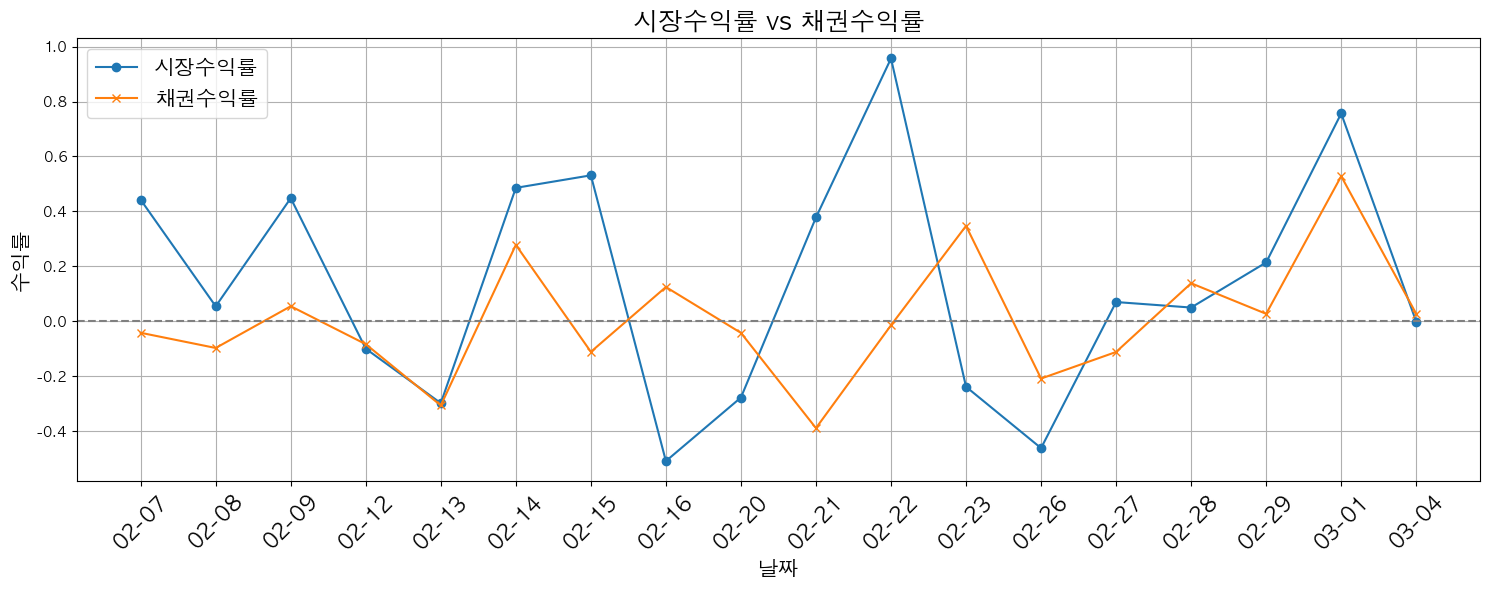

In [13]:
# 한달동안의 시장수익률 vs 채권수익률 비교 그래프

# 영업일 기준 한달전 데이터만 가져오기
tmp = df[-20:]

tmp = tmp.reset_index()
tmp.rename(columns={'index':'date'}, inplace=True)

# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['date'] = tmp['date'].astype(str)
tmp['date'] = tmp['date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

# 날짜를 기준으로 데이터 정렬
tmp = tmp.sort_values(by='date')

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 선 그래프 그리기
plt.plot(tmp['date'], tmp['sp500'], marker='o', label='시장수익률', linestyle='-')
plt.plot(tmp['date'], tmp['bond_etf'], marker='x', label='채권수익률', linestyle='-')

# 그래프 제목 설정
plt.title('시장수익률 vs 채권수익률', fontsize=18)

# x 축 레이블 설정
plt.xlabel('날짜', fontsize=15)

# y 축 레이블 설정
plt.ylabel('수익률', fontsize=15)

# 범례 표시
plt.legend(fontsize=15)

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x 축 눈금 레이블 45도 회전

# x 축에 모든 날짜 표시
plt.xticks(tmp['date'], rotation=45, fontsize=15)
plt.axhline(0, color='gray', linestyle='--')

plt.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

In [14]:
# # 서브 플롯 생성 (1행 3열)
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# # 첫 번째 서브 플롯
# tmp1 = one_month.loc[['sp500', 'bond_etf']]
# axes[0].bar(tmp1.index, tmp1['yield'])
# axes[0].set_title('1개월 수익률')
# axes[0].set_xlabel('자산')
# axes[0].set_ylabel('수익률', rotation=0)
# axes[0].tick_params(axis='x')
# axes[0].set_ylim(-0.2, 0.2)  # y 축 범위 설정
# #axes[0].axhline(0, color='gray', linestyle='--')

# # 두 번째 서브 플롯
# tmp2 = two_week.loc[['sp500', 'bond_etf']]
# axes[1].bar(tmp2.index, tmp2['yield'])
# axes[1].set_title('2주 수익률')
# axes[1].set_xlabel('자산')
# axes[1].set_ylabel('수익률', rotation=0)
# axes[1].tick_params(axis='x')
# axes[1].set_ylim(-0.2, 0.2)  # y 축 범위 설정
# #axes[1].axhline(0, color='gray', linestyle='--')

# # 세 번째 서브 플롯
# tmp3 = one_week.loc[['sp500', 'bond_etf']]
# axes[2].bar(tmp3.index, tmp3['yield'])
# axes[2].set_title('1주 수익률')
# axes[2].set_xlabel('자산')
# axes[2].set_ylabel('수익률', rotation=0)
# axes[2].tick_params(axis='x')
# axes[2].set_ylim(-0.2, 0.2)  # y 축 범위 설정
# #axes[2].axhline(0, color='gray', linestyle='--')

# # yticker 위치 조정
# for ax in axes:
#     ax.yaxis.set_label_coords(-0.18, 0.5)

# plt.tight_layout()  # 그래프 간격 조절
# plt.show()

## 5. 섹터수익률 vs 시장수익률
- 섹터수익률 - 시장수익률을 통한 상대수익률 계산
- 가장 많이 이긴(수익률이 가장 높은) 섹터 출력

In [15]:
# 상대수익률 계산함수
def relative_return(df):
    for i in range(df.shape[0] - 2):
        df.iloc[i] = df.iloc[i] - df.iloc[-2]
    return df[:-2]

In [16]:
# 상대수익률 계산
one_week = relative_return(one_week)
two_week = relative_return(two_week)
one_month = relative_return(one_month)

In [17]:
# 데이터프레임의 index를 reset하고 컬럼명을 'sector'로 변경
one_week = one_week.reset_index()
one_week = one_week.rename(columns={'index': 'sector'})

two_week = two_week.reset_index()
two_week = two_week.rename(columns={'index': 'sector'})

one_month = one_month.reset_index()
one_month = one_month.rename(columns={'index': 'sector'})

In [18]:
# sector 컬럼 기준으로 데이터 합치기
merged_df = pd.merge(one_week, two_week, on='sector')
merged_df = pd.merge(merged_df, one_month, on='sector')

# 컬럼명 바꾸기
merged_df.rename(columns={
    'yield_x': 'one_week',
    'yield_y': 'two_week',
    'yield': 'one_month'
}, inplace=True)

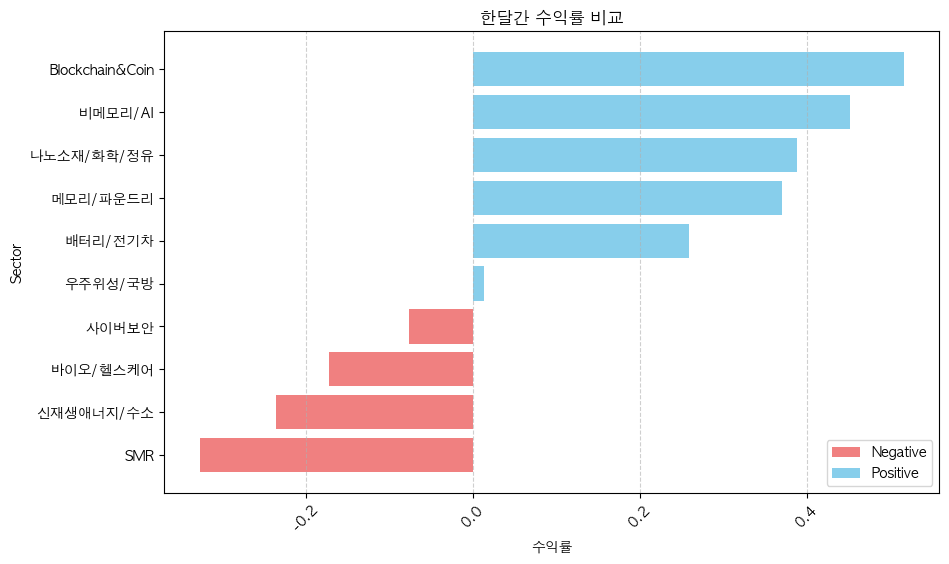

In [19]:
# 한달간 수익률 비교
tmp = merged_df.sort_values(by='one_month')

positive_df = tmp[tmp['one_month'] >= 0]
negative_df = tmp[tmp['one_month'] < 0]

# 양수와 음수 부분을 나란히 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.barh(negative_df['sector'], negative_df['one_month'], color='lightcoral', left=0, label='Negative')
plt.barh(positive_df['sector'], positive_df['one_month'], color='skyblue', left=0, label='Positive')
plt.xlabel('수익률')
plt.ylabel('Sector')
plt.title('한달간 수익률 비교')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')  # 범례 위치 설정

plt.xticks(rotation=45)
# plt.gca().invert_xaxis()  # X 축 레이블 반전

plt.show()

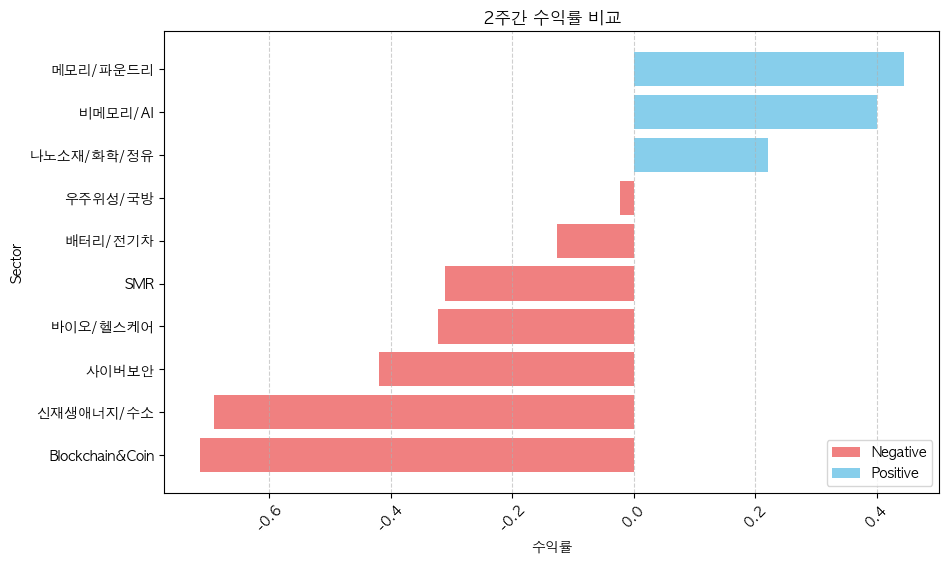

In [20]:
# 2주간 수익률 비교
tmp = merged_df.sort_values(by='two_week')

positive_df = tmp[tmp['two_week'] >= 0]
negative_df = tmp[tmp['two_week'] < 0]

# 양수와 음수 부분을 나란히 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.barh(negative_df['sector'], negative_df['two_week'], color='lightcoral', left=0, label='Negative')
plt.barh(positive_df['sector'], positive_df['two_week'], color='skyblue', left=0, label='Positive')
plt.xlabel('수익률')
plt.ylabel('Sector')
plt.title('2주간 수익률 비교')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')  # 범례 위치 설정

plt.xticks(rotation=45)
# plt.gca().invert_xaxis()  # X 축 레이블 반전

plt.show()

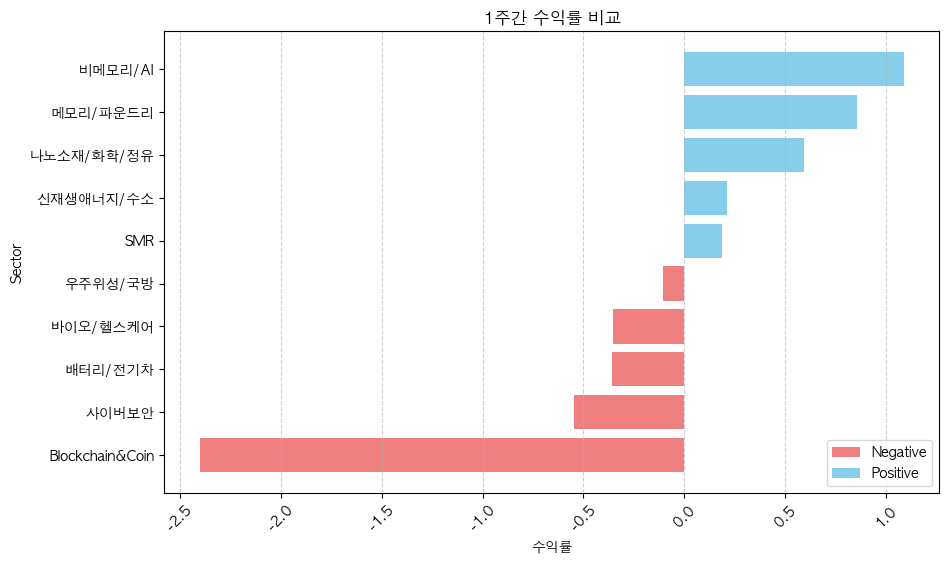

In [21]:
# 1주간 수익률 비교
tmp = merged_df.sort_values(by='one_week')

positive_df = tmp[tmp['one_week'] >= 0]
negative_df = tmp[tmp['one_week'] < 0]

# 양수와 음수 부분을 나란히 그래프로 그리기
plt.figure(figsize=(10, 6))
plt.barh(negative_df['sector'], negative_df['one_week'], color='lightcoral', left=0, label='Negative')
plt.barh(positive_df['sector'], positive_df['one_week'], color='skyblue', left=0, label='Positive')
plt.xlabel('수익률')
plt.ylabel('Sector')
plt.title('1주간 수익률 비교')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')  # 범례 위치 설정

plt.xticks(rotation=45)
# plt.gca().invert_xaxis()  # X 축 레이블 반전

plt.show()

## 6. 섹터 상위, 하위 3개 종목 선그래프 그리기

In [22]:
# 섹터별로 평균 수익률 계산
avg_yield = merged_df[['one_week', 'two_week', 'one_month']].mean(axis=1) # one_week, two_week, one_month의 평균

df = pd.DataFrame()
df['sector'] = merged_df['sector']
df['avg_yield'] = avg_yield
top = df.sort_values(by='avg_yield', ascending=False)['sector'][:3].values
bottom = df.sort_values(by='avg_yield', ascending=False)['sector'][-3:].values

In [23]:
# top3, bottom3 섹터와 index 명을 가져옴
top_sectors = list(top)
bottom_sectors = list(bottom)

# 가져온 섹터명에 해당하는 데이터 가져옴
top_total_period = total_period[top_sectors]
bottom_total_period = total_period[bottom_sectors]

top_total_period.reset_index(inplace=True)
bottom_total_period.reset_index(inplace=True)

# index 컬럼명을 date로 변경
top_total_period = top_total_period.rename(columns={'index':'date'})
bottom_total_period = bottom_total_period.rename(columns={'index':'date'})

### 6-1) 절대수익률 그래프

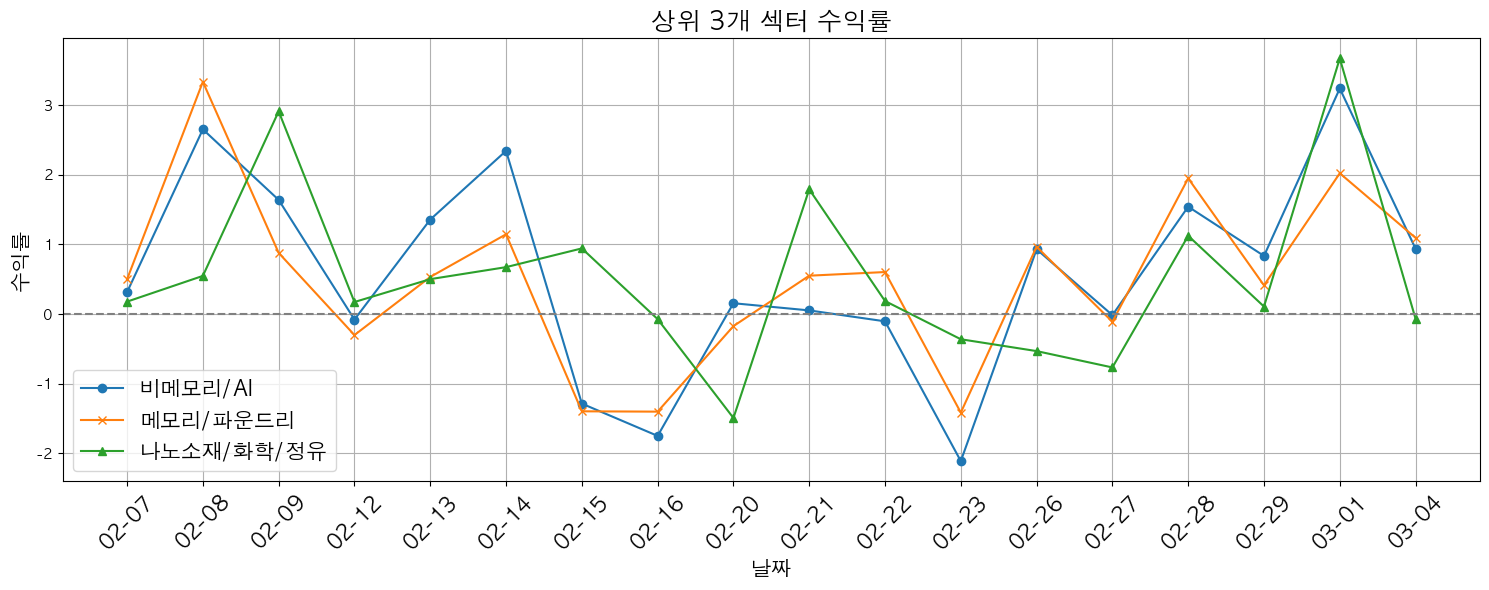

In [24]:
# 상위 3개 섹터 선 그래프 (절대수익률)

# 상위 3개 섹터 데이터 가져오기
tmp = top_total_period.copy()
# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['date'] = tmp['date'].astype(str)
tmp['date'] = tmp['date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

# 날짜를 기준으로 데이터 정렬
tmp = tmp.sort_values(by='date')

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 선 그래프 그리기
plt.plot(tmp['date'], tmp[tmp.columns[1]], marker='o', label=tmp.columns[1], linestyle='-')
plt.plot(tmp['date'], tmp[tmp.columns[2]], marker='x', label=tmp.columns[2], linestyle='-')
plt.plot(tmp['date'], tmp[tmp.columns[3]], marker='^', label=tmp.columns[3], linestyle='-')

# 그래프 제목 설정
plt.title('상위 3개 섹터 수익률', fontsize=18)

# x 축 레이블 설정
plt.xlabel('날짜', fontsize=15)

# y 축 레이블 설정
plt.ylabel('수익률', fontsize=15)

# 범례 표시
plt.legend(fontsize=15)

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x 축 눈금 레이블 45도 회전

# x 축에 모든 날짜 표시
plt.xticks(tmp['date'], rotation=45, fontsize=15)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

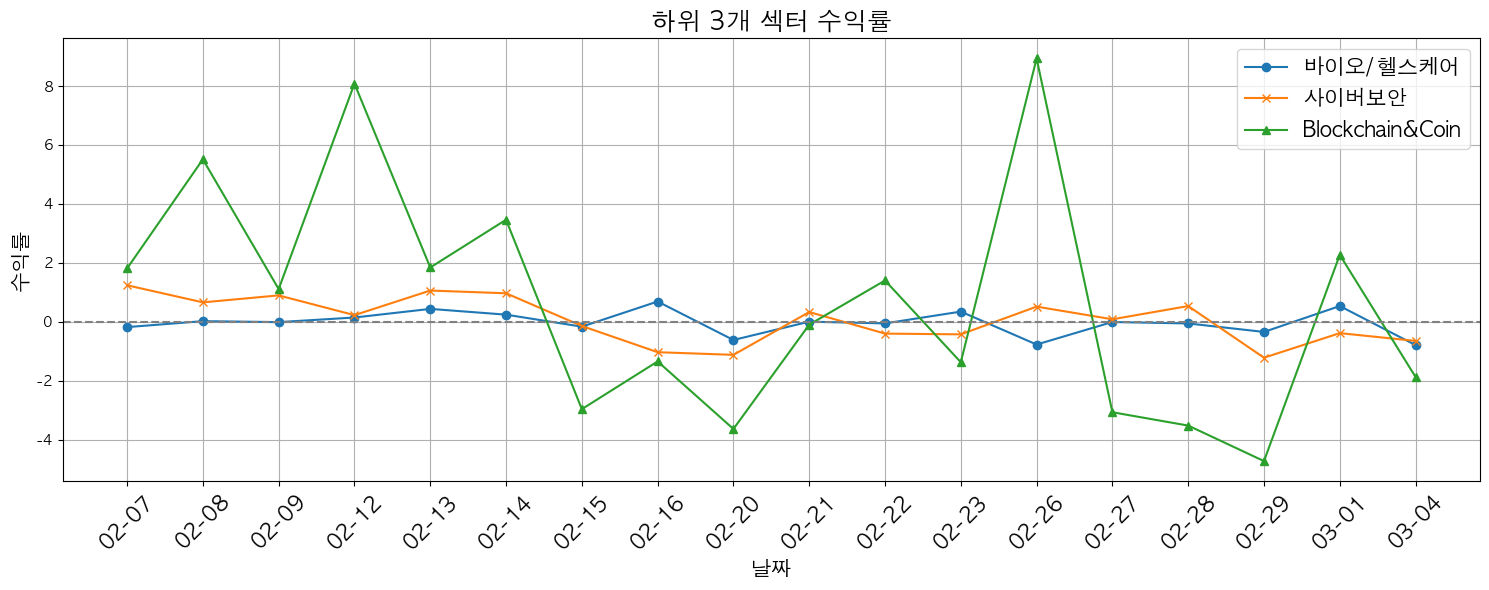

In [25]:
# 하위 3개 섹터 선 그래프

# 하위 3개 섹터 데이터 가져오기
tmp = bottom_total_period.copy()
# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['date'] = tmp['date'].astype(str)
tmp['date'] = tmp['date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

# 날짜를 기준으로 데이터 정렬
tmp = tmp.sort_values(by='date')

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 선 그래프 그리기
plt.plot(tmp['date'], tmp[tmp.columns[1]], marker='o', label=tmp.columns[1], linestyle='-')
plt.plot(tmp['date'], tmp[tmp.columns[2]], marker='x', label=tmp.columns[2], linestyle='-')
plt.plot(tmp['date'], tmp[tmp.columns[3]], marker='^', label=tmp.columns[3], linestyle='-')

# 그래프 제목 설정
plt.title('하위 3개 섹터 수익률', fontsize=18)

# x 축 레이블 설정
plt.xlabel('날짜', fontsize=15)

# y 축 레이블 설정
plt.ylabel('수익률', fontsize=15)

# 범례 표시
plt.legend(fontsize=15)

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x 축 눈금 레이블 45도 회전

# x 축에 모든 날짜 표시
plt.xticks(tmp['date'], rotation=45, fontsize=15)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

### 6-2) 절대수익률의 단순이동평균 그래프
- 추세를 더욱 잘 파악할 수 있음
- 참고자료: https://zephyrus1111.tistory.com/207

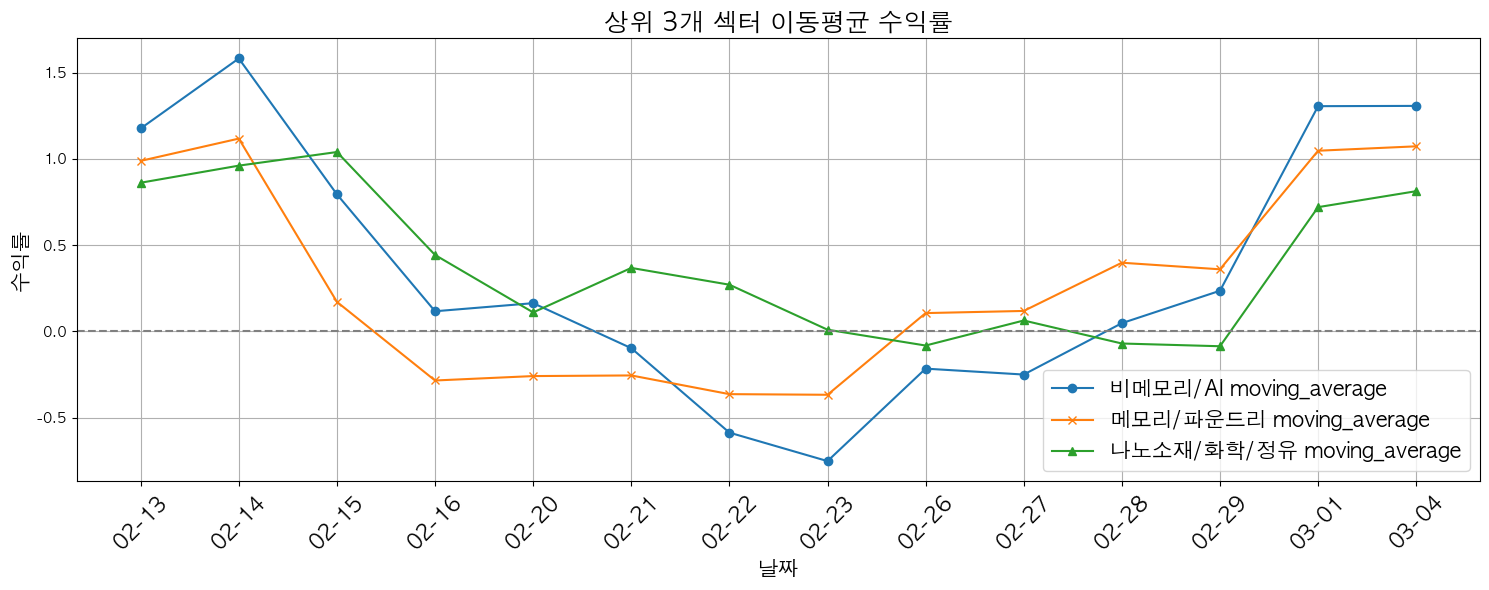

In [26]:
# 상위 3개 섹터 선 그래프 (절대수익률의 단순이동평균)

# 이동평균계산
top_moving_average = top_total_period.set_index('date').rolling(window=5).mean()

# 상위 3개 섹터 데이터 가져오기
tmp = top_moving_average #.dropna()
tmp.reset_index(inplace=True)
# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['date'] = tmp['date'].astype(str)
tmp['date'] = tmp['date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

# 날짜를 기준으로 데이터 정렬
tmp = tmp.sort_values(by='date')
tmp = tmp.dropna()
tmp.set_index('date', inplace=True)

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 선 그래프 그리기
plt.plot(tmp.index, tmp.iloc[:,0], marker='o', label=f"{tmp.columns[0]} moving_average", linestyle='-')
plt.plot(tmp.index, tmp.iloc[:,1], marker='x', label=f"{tmp.columns[1]} moving_average", linestyle='-')
plt.plot(tmp.index, tmp.iloc[:,2], marker='^', label=f"{tmp.columns[2]} moving_average", linestyle='-')

# 그래프 제목 설정
plt.title('상위 3개 섹터 이동평균 수익률', fontsize=18)

# x 축 레이블 설정
plt.xlabel('날짜', fontsize=15)

# y 축 레이블 설정
plt.ylabel('수익률', fontsize=15)

# 범례 표시
plt.legend(fontsize=15)

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x 축 눈금 레이블 45도 회전

# x 축에 모든 날짜 표시
plt.xticks(tmp.index, rotation=45, fontsize=15)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

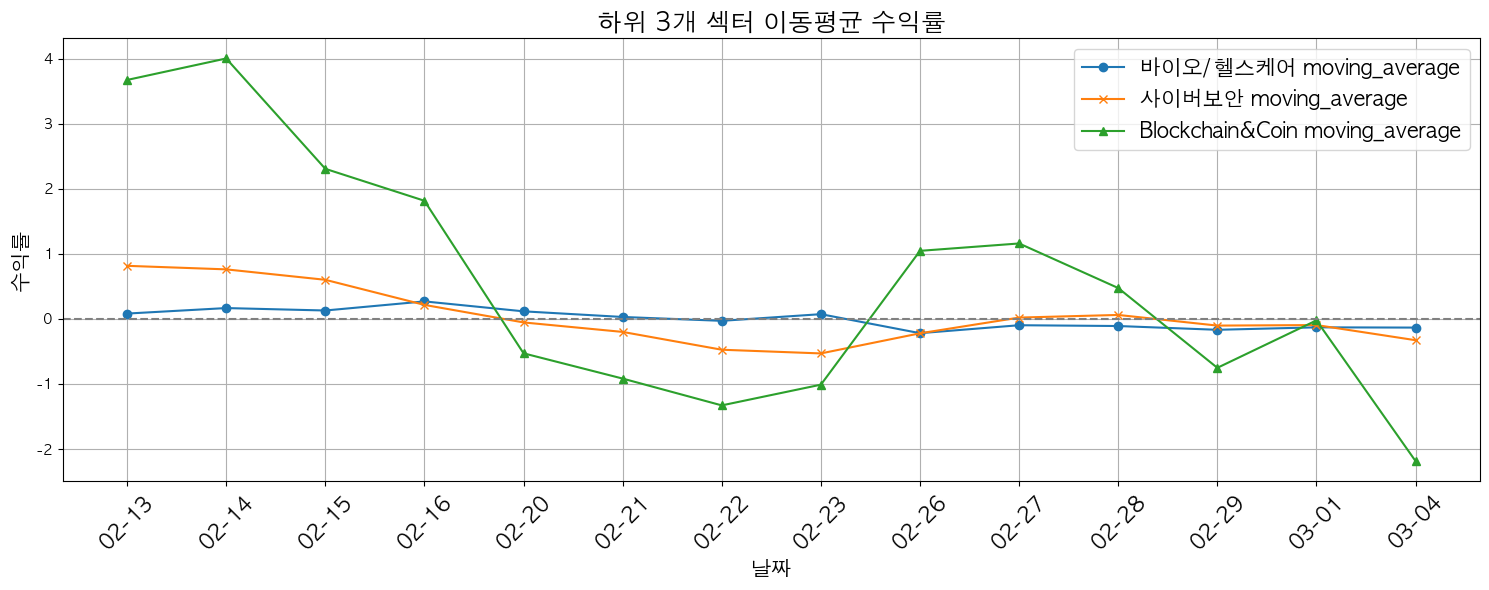

In [27]:
# 하위 3개 섹터 선 그래프 (절대수익률의 단순이동평균)

# 이동평균 계산
bottom_moving_average = bottom_total_period.set_index('date').rolling(window=5).mean().dropna()

# 하위 3개 섹터 데이터 가져오기
tmp = bottom_moving_average
tmp.reset_index(inplace=True)
# datetime 형태를 character로 (x축에 모든 date를 연속적으로 표시하기 위함)
tmp['date'] = tmp['date'].astype(str)
tmp['date'] = tmp['date'].apply(lambda x: x[5:]) # 년도를 제거하고 월,일의 데이터만 추출

# 날짜를 기준으로 데이터 정렬
tmp = tmp.sort_values(by='date')
tmp = tmp.dropna()
tmp.set_index('date', inplace=True)

# 그래프 크기 설정
plt.figure(figsize=(15, 6))

# 선 그래프 그리기
plt.plot(tmp.index, tmp.iloc[:,0], marker='o', label=f"{tmp.columns[0]} moving_average", linestyle='-')
plt.plot(tmp.index, tmp.iloc[:,1], marker='x', label=f"{tmp.columns[1]} moving_average", linestyle='-')
plt.plot(tmp.index, tmp.iloc[:,2], marker='^', label=f"{tmp.columns[2]} moving_average", linestyle='-')

# 그래프 제목 설정
plt.title('하위 3개 섹터 이동평균 수익률', fontsize=18)

# x 축 레이블 설정
plt.xlabel('날짜', fontsize=15)

# y 축 레이블 설정
plt.ylabel('수익률', fontsize=15)

# 범례 표시
plt.legend(fontsize=15)

# 그래프 표시
plt.grid(True)  # 그리드 표시
plt.xticks(rotation=45)  # x 축 눈금 레이블 45도 회전

# x 축에 모든 날짜 표시
plt.xticks(tmp.index, rotation=45, fontsize=15)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()  # 레이아웃 조정

# 그래프 출력
plt.show()

In [28]:
# 각 섹터의 수익률이 양수인지 음수인지 확인하고 출력

# 각 기간 별로 가장 높은 수익률을 가진 섹터 찾기
max_one_week_sector = merged_df[merged_df['one_week'] == merged_df['one_week'].max()]['sector'].values[0]
max_two_week_sector = merged_df[merged_df['two_week'] == merged_df['two_week'].max()]['sector'].values[0]
max_one_month_sector = merged_df[merged_df['one_month'] == merged_df['one_month'].max()]['sector'].values[0]

result = []

for sector in merged_df['sector']:
    one_week_yield = merged_df[merged_df['sector'] == sector]['one_week'].values[0]
    two_week_yield = merged_df[merged_df['sector'] == sector]['two_week'].values[0]
    one_month_yield = merged_df[merged_df['sector'] == sector]['one_month'].values[0]
    
    is_positive = (one_week_yield > 0) and (two_week_yield > 0) and (one_month_yield > 0)
    is_negative = (one_week_yield < 0) and (two_week_yield < 0) and (one_month_yield < 0)
    
    result.append((sector, is_positive, is_negative))

# 결과 출력
print(f"one_week 가장 높은 수익률을 가진 섹터: {max_one_week_sector}")
print(f"two_week 가장 높은 수익률을 가진 섹터: {max_two_week_sector}")
print(f"one_month 가장 높은 수익률을 가진 섹터: {max_one_month_sector}")

print("\n각 섹터의 수익률이 모든 기간동안 양수인 경우:")
for sector, is_positive, is_negative in result:
    if is_positive:
        print(f"{sector}: one_week, two_week, one_month 모두 양수")
print("\n각 섹터의 수익률이 모든 기간동안 음수인 경우:")
for sector, is_positive, is_negative in result:
    if is_negative:
        print(f"{sector}: one_week, two_week, one_month 모두 음수")

one_week 가장 높은 수익률을 가진 섹터: 비메모리/AI
two_week 가장 높은 수익률을 가진 섹터: 메모리/파운드리
one_month 가장 높은 수익률을 가진 섹터: Blockchain&Coin

각 섹터의 수익률이 모든 기간동안 양수인 경우:
비메모리/AI: one_week, two_week, one_month 모두 양수
메모리/파운드리: one_week, two_week, one_month 모두 양수
나노소재/화학/정유: one_week, two_week, one_month 모두 양수

각 섹터의 수익률이 모든 기간동안 음수인 경우:
바이오/헬스케어: one_week, two_week, one_month 모두 음수
사이버보안: one_week, two_week, one_month 모두 음수


In [29]:
# 각 섹터의 수익률이 양수인지 음수인지 확인하고 출력
result = []

for sector in merged_df['sector']:
    one_week_yield = round(merged_df[merged_df['sector'] == sector]['one_week'].values[0], 4)
    two_week_yield = round(merged_df[merged_df['sector'] == sector]['two_week'].values[0], 4)
    one_month_yield = round(merged_df[merged_df['sector'] == sector]['one_month'].values[0], 4)
    
    is_one_week_positive = one_week_yield > 0
    is_two_week_positive = two_week_yield > 0
    is_one_month_positive = one_month_yield > 0
    
    is_one_week_negative = one_week_yield < 0
    is_two_week_negative = two_week_yield < 0
    is_one_month_negative = one_month_yield < 0
    
    result.append((sector, 
                   is_one_week_positive, is_two_week_positive, is_one_month_positive,
                   is_one_week_negative, is_two_week_negative, is_one_month_negative,
                   one_week_yield, two_week_yield, one_month_yield))

# 결과 출력
print("각 섹터별로 one_week, two_week, one_month 별로:")
for sector, \
    is_one_week_pos, is_two_week_pos, is_one_month_pos, \
    is_one_week_neg, is_two_week_neg, is_one_month_neg, \
    one_week_yield, two_week_yield, one_month_yield in result:

    print(f"{sector}:")
    
    if is_one_week_pos:
        print(f"  - one_week: 양수 ({one_week_yield})")
    else:
        print(f"  - one_week: 음수 ({one_week_yield})")
    
    if is_two_week_pos:
        print(f"  - two_week: 양수 ({two_week_yield})")
    else:
        print(f"  - two_week: 음수 ({two_week_yield})")
    
    if is_one_month_pos:
        print(f"  - one_month: 양수 ({one_month_yield})")
    else:
        print(f"  - one_month: 음수 ({one_month_yield})")

    print()  # 각 섹터 간에 공백 출력

각 섹터별로 one_week, two_week, one_month 별로:
비메모리/AI:
  - one_week: 양수 (1.0886)
  - two_week: 양수 (0.4006)
  - one_month: 양수 (0.452)

신재생애너지/수소:
  - one_week: 양수 (0.2118)
  - two_week: 음수 (-0.6913)
  - one_month: 음수 (-0.2357)

Blockchain&Coin:
  - one_week: 음수 (-2.4029)
  - two_week: 음수 (-0.7146)
  - one_month: 양수 (0.5167)

SMR:
  - one_week: 양수 (0.1845)
  - two_week: 음수 (-0.3108)
  - one_month: 음수 (-0.3274)

바이오/헬스케어:
  - one_week: 음수 (-0.3517)
  - two_week: 음수 (-0.3214)
  - one_month: 음수 (-0.1723)

메모리/파운드리:
  - one_week: 양수 (0.8544)
  - two_week: 양수 (0.4444)
  - one_month: 양수 (0.3708)

배터리/전기차:
  - one_week: 음수 (-0.3605)
  - two_week: 음수 (-0.1273)
  - one_month: 양수 (0.2585)

나노소재/화학/정유:
  - one_week: 양수 (0.5945)
  - two_week: 양수 (0.2205)
  - one_month: 양수 (0.3887)

우주위성/국방:
  - one_week: 음수 (-0.1059)
  - two_week: 음수 (-0.0236)
  - one_month: 양수 (0.014)

사이버보안:
  - one_week: 음수 (-0.5456)
  - two_week: 음수 (-0.4193)
  - one_month: 음수 (-0.0768)

